In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./placement.csv')

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [4]:
df.duplicated('iq').sum()

np.int64(29)

In [5]:
df.shape

(100, 3)

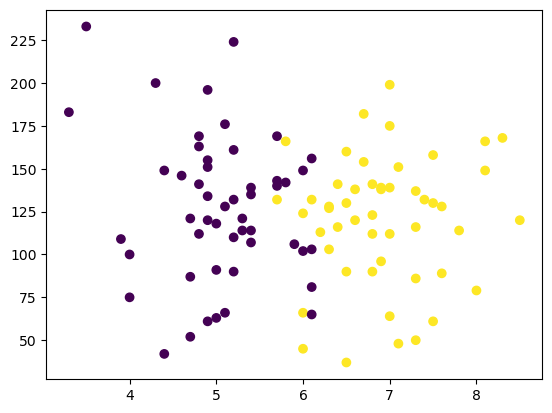

In [6]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [7]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [9]:
x_train

,cgpa,iq
19,5.2,132.0
29,7.0,112.0
22,4.9,120.0
60,6.9,139.0
42,7.6,89.0
...,...,...
11,6.9,138.0
68,4.0,75.0
61,7.3,137.0
44,7.5,61.0


In [10]:
y_train

19    0
29    1
22    0
60    1
42    1
     ..
11    1
68    0
61    1
44    1
8     0
Name: placement, Length: 90, dtype: int64

In [11]:
x_test

,cgpa,iq
18,4.0,100.0
3,7.4,132.0
82,6.5,37.0
31,3.9,109.0
58,8.0,79.0
21,7.1,151.0
72,7.3,116.0
71,6.1,132.0
55,7.8,114.0
38,6.5,160.0


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
x_train = scaler.fit_transform(x_train)

In [15]:
x_train

array([[-0.67409248,  0.18035333],
       [ 0.96805762, -0.31755463],
       [-0.94778416, -0.11839145],
       [ 0.87682705,  0.35462111],
       [ 1.51544098, -0.89014878],
       [ 0.05575201, -0.56650861],
       [-0.21793967,  0.18035333],
       [-2.40747313,  1.45001862],
       [-0.58286192, -0.09349605],
       [ 1.97159378,  0.60357509],
       [ 0.14698257, -0.54161321],
       [ 0.78559649, -0.31755463],
       [-0.94778416,  0.65336589],
       [ 1.2417493 , -0.96483497],
       [-1.49516752,  1.87324038],
       [ 2.33651602, -0.11839145],
       [ 1.42421042,  0.13056253],
       [ 0.14698257, -1.48763833],
       [ 1.97159378,  1.02679685],
       [-0.94778416, -1.58721992],
       [ 0.60313537,  0.32972571],
       [ 0.05575201, -1.98554628],
       [ 0.78559649,  0.40441191],
       [ 0.60313537, -0.11839145],
       [-0.21793967,  0.37951651],
       [-0.67409248,  0.90231986],
       [ 0.78559649, -0.86525338],
       [ 1.2417493 , -1.8610693 ],
       [ 0.51190481,

In [16]:
x_test = scaler.transform(x_test)

In [17]:
x_test

array([[-1.7688592 , -0.6162994 ],
       [ 1.33297986,  0.18035333],
       [ 0.51190481, -2.18470947],
       [-1.86008976, -0.39224082],
       [ 1.88036322, -1.13910276],
       [ 1.05928818,  0.65336589],
       [ 1.2417493 , -0.21797304],
       [ 0.14698257,  0.18035333],
       [ 1.6979021 , -0.26776383],
       [ 0.51190481,  0.87742447]])

In [18]:
from sklearn.linear_model import LogisticRegression


In [19]:
clf = LogisticRegression()

In [20]:
#model train 
clf.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
y_pred = clf.predict(x_test)

In [22]:
y_test

18    0
3     1
82    1
31    0
58    1
21    1
72    1
71    1
55    1
38    1
Name: placement, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) 

1.0

<Axes: >

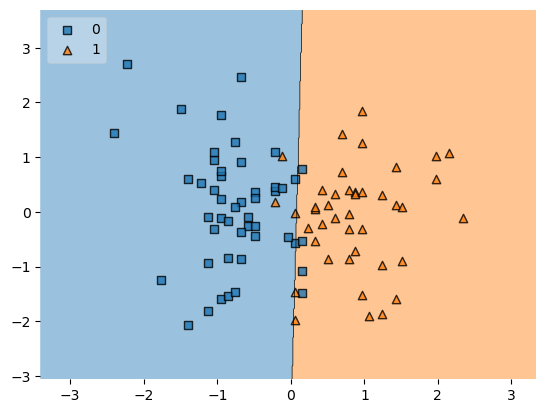

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [29]:
import pickle

In [30]:
pickle.dump(clf,open('model.pkl','wb'))